# <div class="alert alert-info"> 1. Overview </div>

---
---
# <div class="alert alert-info"> 2. Setup </div>

In [3]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, NoNorm

# matplotlib for graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
# import seaborn to make nice plots
import seaborn as sns
%matplotlib inline


# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


---
---
# <div class="alert alert-info"> 3. Data Preparation </div>

 ## <font color=red>**3.1. Import dataset**

In [2]:
# read the CSV file
file = '../../01-ML/data/cs-training.csv'
df=pd.read_csv(file, na_values='NA')
# obtain the summarized statistics and get several 'pandas.core.series.Series' object 
print(df.shape)
df.head()

(150000, 12)


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


 ## <font color=red>**3.2. remove redundant features**

In [4]:
removed_list = ['ID']
selected_list = [var for var in df.columns if var not in removed_list]
df = df[selected_list]
df.rename(columns={'SeriousDlqin2yrs':'Class'}, inplace=True)
print(df.shape)
df.head()

(150000, 11)


,Class,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


 ## <font color=red>**3.3. Handling missing data**

In [28]:
#df['MonthIncome_miss']=pd.isnull(df['MonthlyIncome'])+0
#df['NumDependents_miss']=pd.isnull(df['NumberOfDependents'])+0

#df = df.fillna(df.mean())

#### NumberOfDependents

In [5]:
df.loc[df['NumberOfDependents'].isnull()==True,'NumberOfDependents'] = df['NumberOfDependents'].mean()

#### MonthIncome

In [6]:
df1 = df.copy()
df1 = df1[df1.MonthlyIncome> 0 ]
df1.shape

(118635, 11)

In [7]:
df1_features = ['Class', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfDependents']
df1_target = 'MonthlyIncome'

In [8]:
df1_features

['Class',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [9]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

gbt_model = GradientBoostingRegressor(max_depth=5, max_features=7, n_estimators=200)
gbt_model.fit(df1[df1_features], df1[df1_target])
score = gbt_model.score(df1[df1_features], df1[df1_target])
score

0.9029780589391756

In [10]:
df.loc[df.MonthlyIncome.isnull()==True, 'MonthlyIncome'] = gbt_model.predict(df.loc[df.MonthlyIncome.isnull()==True, df1_features])

 ## <font color=red>**3.4. Fixing outliers & rare values**

In [11]:
df['NumberOfTime30-59DaysPastDueNotWorse'] = df[['NumberOfTime30-59DaysPastDueNotWorse']].applymap(lambda x:x if x<5 else 5)
df['NumberOfTimes90DaysLate'] = df[['NumberOfTimes90DaysLate']].applymap(lambda x:x if x<5 else 5)
df['NumberOfTime60-89DaysPastDueNotWorse'] = df[['NumberOfTime60-89DaysPastDueNotWorse']].applymap(lambda x:x if x<5 else 5)
df['NumberRealEstateLoansOrLines'] = df[['NumberRealEstateLoansOrLines']].applymap(lambda x:x if x<5 else 5)
df['NumberOfDependents'] = df[['NumberOfDependents']].applymap(lambda x:x if x<5 else 5)


In [12]:
def find_skewed_boundaries(var, distance):
    # distance passed as an argument, give us the option 
    # to estimate 1.5 times or 3 times the IQR to calculate the boundaries
    IQR = var.quantile(0.75) - var.quantile(0.25) 
    lower_boundary = var.quantile(0.25) - (IQR * distance)
    upper_boundary = var.quantile(0.75) + (IQR * distance)
    
    print('upper_boundary, lower_boundary: ', upper_boundary, lower_boundary)
    print('total number of var: {}'.format(len(var)))
    print('number of data points with more than upper_boundary (right end outliers): {}'.format(
        (var > upper_boundary).sum()))
    print('number of data points with less than lower_boundary (left end outliers: {}'.format(
        (var < lower_boundary).sum()))
    print('% right end outliers: {}'.format((var > upper_boundary).sum() / len(var)))
    print('% left end outliers: {}'.format((var < lower_boundary).sum() / len(var)))
    
    return upper_boundary, lower_boundary

In [13]:
outlier_vars = ['RevolvingUtilizationOfUnsecuredLines', 
                'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']
for var in outlier_vars:
    upper_boundary, lower_boundary = find_skewed_boundaries(df[var], 4)
    df.loc[df[var] <= lower_boundary, var] = lower_boundary
    df.loc[df[var] >= upper_boundary, var] = upper_boundary

upper_boundary, lower_boundary:  2.6757614695 -2.08684778
total number of var: 150000
number of data points with more than upper_boundary (right end outliers): 304
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.0020266666666666666
% left end outliers: 0.0
upper_boundary, lower_boundary:  3.64097353725 -2.59764593175
total number of var: 150000
number of data points with more than upper_boundary (right end outliers): 30129
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.20086
% left end outliers: 0.0
upper_boundary, lower_boundary:  29769.0 -20561.25
total number of var: 150000
number of data points with more than upper_boundary (right end outliers): 885
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.0059
% left end outliers: 0.0
upper_boundary, lower_boundary:  35.0 -19.0
total number of var: 150000
number of data points with more than 

 ## <font color=red>**3.5. Data Normalization**

In [14]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

scaler = MinMaxScaler(feature_range = (0, 1))
df = df.reset_index(drop=True)
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[selected_features]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = selected_features
print(X_scaled.shape)
X_scaled.head()

(150000, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.286321,0.412844,0.4,0.220541,0.512778,0.371429,0.0,1.0,0.0,0.4
1,0.357712,0.366972,0.0,0.033474,0.358936,0.114286,0.0,0.0,0.0,0.2
2,0.245979,0.348624,0.2,0.023377,0.369365,0.057143,0.2,0.0,0.0,0.0
3,0.087381,0.275229,0.0,0.009901,0.375453,0.142857,0.0,0.0,0.0,0.0
4,0.339058,0.449541,0.2,0.006846,1.000000,0.200000,0.0,0.2,0.0,0.0


 ## <font color=red>**3.6. Splitting data into X & y**

In [15]:
from sklearn.model_selection import train_test_split

X = X_scaled  #independent columns
y = df['Class']    #target column i.e price range

scaled_df =pd.concat([X,y],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

---
---
# <div class="alert alert-info"> 4. Dimension Reduction </div>

 ## <font color=red>**4.1. PCA**</font>

In [16]:
from sklearn.decomposition import PCA

 ### <font color=blue>**1. Train model**

In [41]:
pca = PCA()
X_train_pca = pca.fit(X_train)

 ### <font color=blue>**2. Select number of principle components**

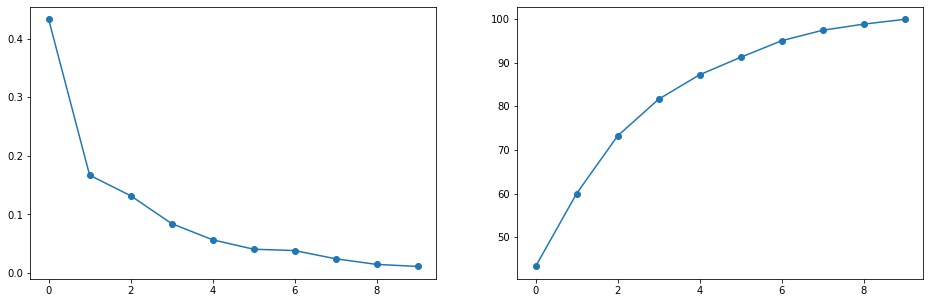

In [42]:
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax[0].plot(pca.explained_variance_ratio_, '-o')
ax[1].plot(cumsum, '-o')
plt.show()

=> The fig on the left side illustrates the variance of each principal component and the fig on the right hand side is the cummulative sum of these principal components

=> It can be seen from the plot that even the first 4 principal component explains  around 80 percent

 ### <font color=blue>**3. Fit and transform with 70% of variance**

In [17]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_train)
X_recovered_pca = pca.inverse_transform(X_pca)

pca.n_components_, np.sum(pca.explained_variance_ratio_)

(6, 0.9083113492746405)

 ### <font color=blue>**4. Plot PCA data with 2 components**

Text(0, 0.5, 'Principal component 2')

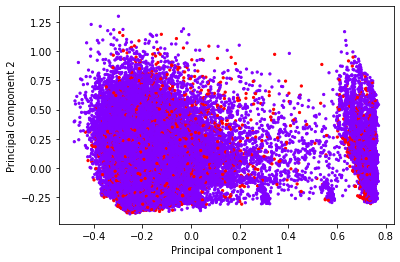

In [18]:
PCA_df = pd.DataFrame(pca.transform(X_train))

cmap = ListedColormap(y_train)
# Show cluster in 2D space
plt.scatter(PCA_df.iloc[:,0], PCA_df.iloc[:,1], s=5, c=y_train, cmap = plt.cm.rainbow)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

Text(0.5, 0.92, '3D plot')

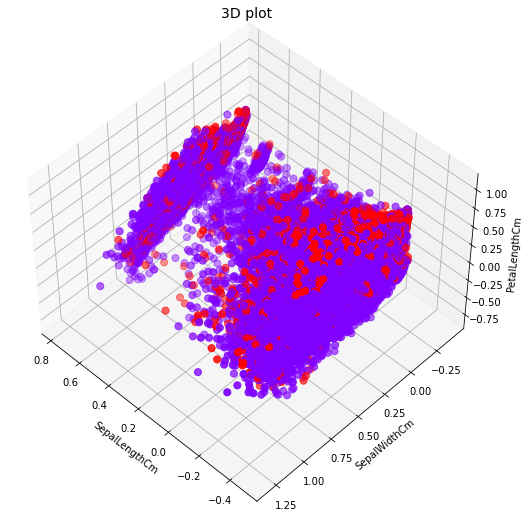

In [19]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(PCA_df.iloc[:,0], PCA_df.iloc[:,1], PCA_df.iloc[:,2],
          c=y_train, cmap = plt.cm.rainbow, s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
plt.title("3D plot", fontsize=14)

 ### <font color=blue>**5. Interpretation of principle components**

In [20]:
df_comp = pd.DataFrame(pca.components_,columns=X_train.columns)

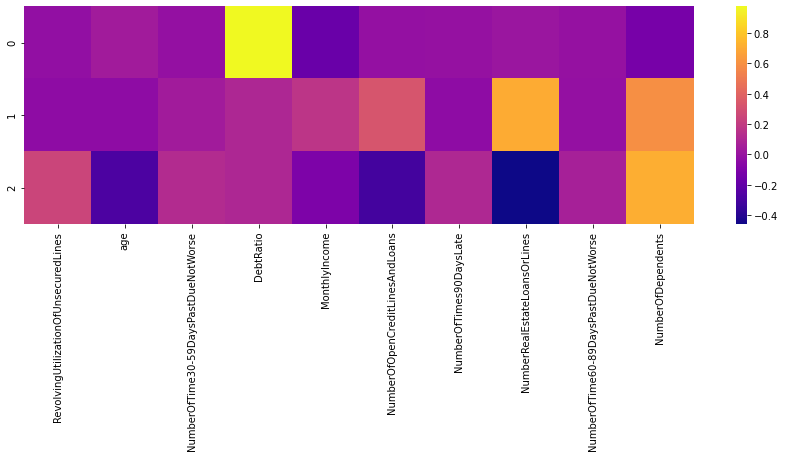

In [21]:
plt.figure(figsize=(15,4))
sns.heatmap(df_comp.iloc[0:3,:],cmap='plasma',)
plt.show()

## <font color=red>**4.2.TSNE**</font>

 ### <font color=blue>**1. Train model**

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=9)

X_train1, X_train2, y_train1,  y_train2 = train_test_split(X_train, y_train, test_size=0.85, random_state=42, stratify=y_train)

X_train1.shape

(18000, 10)

Text(0, 0.5, 'TSNE 2')

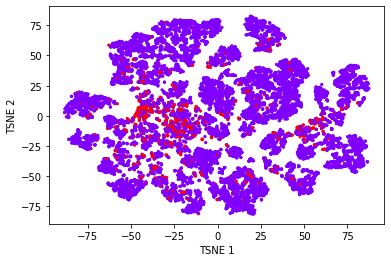

In [52]:
tsne_data = tsne.fit_transform(X_train1)

plt.scatter(tsne_data[:,0], tsne_data[:,1], s=5, c=y_train1, cmap=plt.cm.rainbow)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

## <font color=red>**4.4. Auto Encoder**</font>

 ### <font color=blue>**1. Import library**

In [116]:
# Deep Learnign libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.display import display, Math, Latex
import datetime

### 2.  Construct architecture

In [125]:
tf.random.set_seed(42)
np.random.seed(42)
keras.backend.clear_session()
tf.keras.backend.clear_session()

# No of Neurons in each layer []
input_dim = X_train.shape[1]
encoding1_dim = 50
encoding2_dim = 500
latent_dim = 3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(int(encoding1_dim), activation="relu")(input_layer)
encoder = Dense(int(encoding2_dim), activation='relu')(encoder)
encoder = Dense(int(latent_dim), activation='tanh')(encoder)
decoder = Dense(int(encoding2_dim), activation='tanh')(encoder)
decoder = Dense(int(encoding1_dim), activation='relu')(decoder)
decoder = Dense(int(input_dim), activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 500)               25500     
                                                                 
 dense_2 (Dense)             (None, 3)                 1503      
                                                                 
 dense_3 (Dense)             (None, 500)               2000      
                                                                 
 dense_4 (Dense)             (None, 50)                25050     
                                                                 
 dense_5 (Dense)             (None, 10)                510   

In [127]:
# this models maps an input to its encoded representation
encoder_layer = Model(input_layer, encoder)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(int(latent_dim),))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
# create the decoder model
decoder_layer = Model(encoded_input, decoder_layer(encoded_input))

decoder_layer

### 3. Train model

In [128]:
nb_epoch = 30  # 100
batch_size = 3000  # 3000
autoencoder.compile(optimizer='adam', loss='mse')

cp = ModelCheckpoint(filepath='autoencoder1.h5', save_best_only=True, verbose=0)
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
t_ini = datetime.datetime.now()
history = autoencoder.fit(X_train, 
                          X_train, 
                          epochs=nb_epoch, 
                          batch_size=batch_size, 
                          shuffle=True, 
                          validation_split=0.1,
                          #verbose=1,
).history
t_fin = datetime.datetime.now()
print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))

df_history = pd.DataFrame(history)

Epoch 1/30
36/36 [==============================] - 2s 40ms/step - loss: 0.0598 - val_loss: 0.0487
Epoch 2/30
36/36 [==============================] - 1s 34ms/step - loss: 0.0474 - val_loss: 0.0448
Epoch 3/30
36/36 [==============================] - 1s 36ms/step - loss: 0.0391 - val_loss: 0.0363
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 0.0360 - val_loss: 0.0352
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 0.0352 - val_loss: 0.0345
Epoch 6/30
36/36 [==============================] - 1s 35ms/step - loss: 0.0346 - val_loss: 0.0341
Epoch 7/30
36/36 [==============================] - 1s 35ms/step - loss: 0.0343 - val_loss: 0.0339
Epoch 8/30
36/36 [==============================] - 1s 36ms/step - loss: 0.0283 - val_loss: 0.0144
Epoch 9/30
36/36 [==============================] - 1s 34ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 10/30
36/36 [==============================] - 1s 35ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 11/

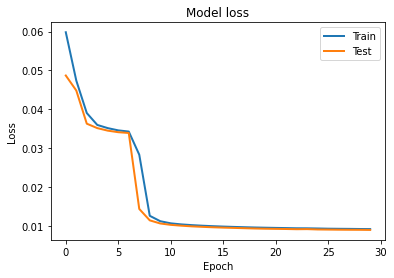

In [129]:
plt.plot(df_history['loss'], linewidth=2, label='Train')
plt.plot(df_history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [142]:
X_train_ae = encoder_layer.predict(X_train)
ae_df = pd.DataFrame(X_train_ae)
ae_df['Class'] = y_train
ae_df.head()

,0,1,2,Class
0,-0.157179,0.248890,0.304933,0
1,-0.377417,0.234910,-0.335096,0
2,0.024565,-0.032240,0.275039,0
3,0.017214,0.220645,0.330534,0
4,0.144223,0.368500,0.049762,0


In [143]:
X_test_ae = encoder_layer.predict(X_test)
ae_test_df = pd.DataFrame(X_test_ae)
ae_test_df['Class'] = y_test
ae_test_df.head()

,0,1,2,Class
0,-0.320237,0.258933,-0.400189,0
1,-0.023310,0.247766,0.155190,0
2,0.047950,-0.024583,0.198368,0
3,-0.299952,0.214228,0.253989,0
4,-0.005885,-0.042296,0.246910,0


### 4. Transform data to embedding layer

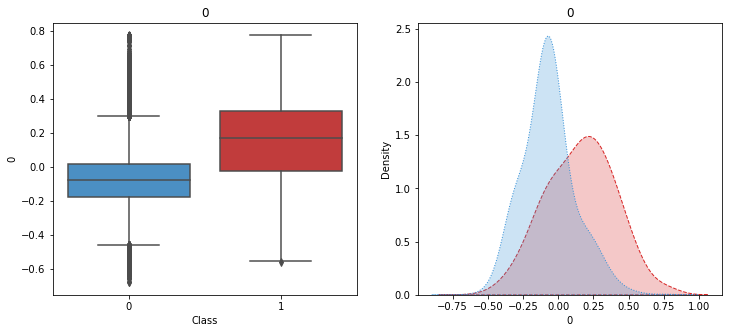

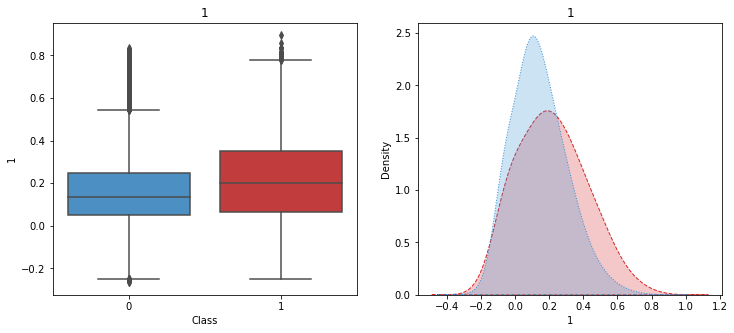

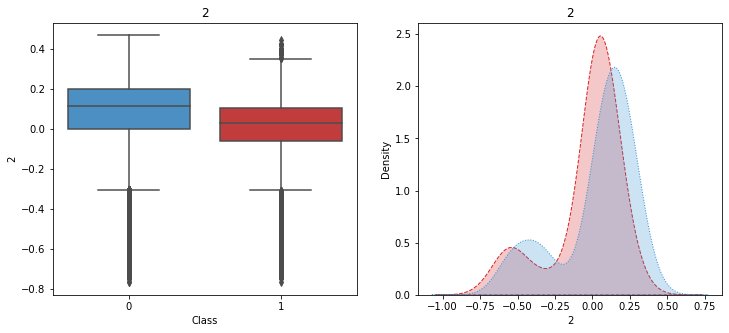

In [131]:
column_headers = ae_df.drop(['Class'],axis=1).columns.values
colors = ['#3791D7','#D72626']

for column_header in column_headers:    
    plt.figure(figsize=[12,5])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=ae_df,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(ae_df[ae_df['Class']==1][column_header], bw = 0.4, label = "Bad loans", shade=True, color='#D72626', linestyle="--")
    sns.kdeplot(ae_df[ae_df['Class']==0][column_header], bw = 0.4, label = "Good loans", shade=True, color= '#3791D7', linestyle=":")
    plt.title(column_header, fontsize=12)
    plt.show()

Text(0.5, 0.92, '3D plot')

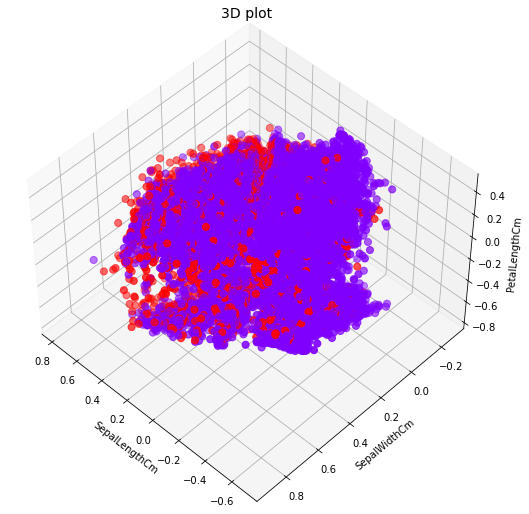

In [132]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(ae_df.iloc[:,0], ae_df.iloc[:,1], ae_df.iloc[:,2],
          c=y_train, cmap = plt.cm.rainbow, s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
plt.title("3D plot", fontsize=14)

In [146]:
ae_features = [0,1,2]

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=6,min_samples_leaf=100, min_samples_split=200, n_estimators=100)
gb_model.fit(ae_df[ae_features], y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=100,
                           min_samples_split=200)

In [152]:
y_train_pred = gb_model.predict(ae_df[ae_features])
prob_train_pred = gb_model.predict_proba(ae_df[ae_features])

y_test_pred = gb_model.predict(ae_test_df[ae_features])
prob_test_pred = gb_model.predict_proba(ae_test_df[ae_features])

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    112043
           1       0.66      0.19      0.30      7957

    accuracy                           0.94    120000
   macro avg       0.80      0.59      0.63    120000
weighted avg       0.93      0.94      0.92    120000



In [154]:
def get_metrics(true_labels, predicted_labels, predicted_prob):
    
    print('Accuracy:', np.round(accuracy_score(true_labels, predicted_labels),4))
    print('Precision:', np.round(precision_score(true_labels, predicted_labels,average='weighted'),4))
    print('Recall:', np.round(recall_score(true_labels,predicted_labels,average='weighted'),4))
    print('F1 Score:', np.round(f1_score(true_labels,predicted_labels,average='weighted'),4))
    print('ROC-AUC: {}'.format(np.round(roc_auc_score(true_labels, predicted_prob),4)))                   

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[0,1]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels,labels=classes)
    cm_df = pd.DataFrame(cm)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print(cm_df) 
    
def display_classification_report(true_labels, predicted_labels, classes=[0,1]):

    report = classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report) 
    
def display_model_performance_metrics(true_labels, predicted_labels, predicted_prob, classes=[0,1]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels, predicted_prob=predicted_prob)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

In [155]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.9398
Precision: 0.9263
Recall: 0.9398
F1 Score: 0.924
ROC-AUC: 0.8571

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    112043
           1       0.66      0.19      0.30      7957

    accuracy                           0.94    120000
   macro avg       0.80      0.59      0.63    120000
weighted avg       0.93      0.94      0.92    120000


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          111250   793
1            6430  1527

Model Performance metrics:
------------------------------
Accuracy: 0.9336
Precision: 0.9152
Recall: 0.9336
F1 Score: 0.9161
ROC-AUC: 0.8417

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27931
   

## <font color=red>**4.5. Variational Auto Encoder**</font>

### 1. Cost function

In [69]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))
        
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

### 2. Train model

In [74]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 3

inputs = keras.layers.Input(shape=[10])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(50, activation="relu")(z)
z = keras.layers.Dense(500, activation="relu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(500, activation="relu")(decoder_inputs)
x = keras.layers.Dense(50, activation="relu")(x)
x = keras.layers.Dense(10, activation="relu")(x)
outputs = keras.layers.Reshape([10])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 10.)
variational_ae.compile(loss="mse", optimizer="adam")
history = variational_ae.fit(X_train, X_train, epochs=30, batch_size=2000,
                             validation_split=0.2)
df_history = pd.DataFrame(history.history)

Epoch 1/30
48/48 [==============================] - 3s 45ms/step - loss: 0.0470 - val_loss: 0.0358
Epoch 2/30
48/48 [==============================] - 2s 38ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 3/30
48/48 [==============================] - 2s 39ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 4/30
48/48 [==============================] - 2s 40ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 5/30
48/48 [==============================] - 2s 38ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 6/30
48/48 [==============================] - 2s 38ms/step - loss: 0.0334 - val_loss: 0.0335
Epoch 7/30
48/48 [==============================] - 2s 41ms/step - loss: 0.0334 - val_loss: 0.0335
Epoch 8/30
48/48 [==============================] - 2s 46ms/step - loss: 0.0334 - val_loss: 0.0334
Epoch 9/30
48/48 [==============================] - 2s 44ms/step - loss: 0.0334 - val_loss: 0.0335
Epoch 10/30
48/48 [==============================] - 2s 41ms/step - loss: 0.0334 - val_loss: 0.0334
Epoch 11/

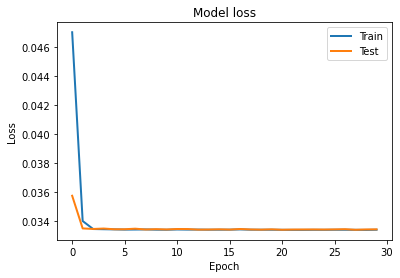

In [75]:
plt.plot(df_history['loss'], linewidth=2, label='Train')
plt.plot(df_history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

### 3.  Transform data to embedding layer

In [76]:
X_train_ae = variational_encoder.predict(X_train)[0]
vae_df = pd.DataFrame(X_train_ae)
vae_df['Class'] = y_train
vae_df.head()

,0,1,2,Class
0,-0.001990,-0.000874,0.002996,0
1,-0.002621,-0.003099,0.000305,0
2,0.003224,0.001247,0.001426,0
3,-0.003178,-0.001564,-0.000560,0
4,-0.005324,0.001639,0.001503,0


#### Visualize transformed data

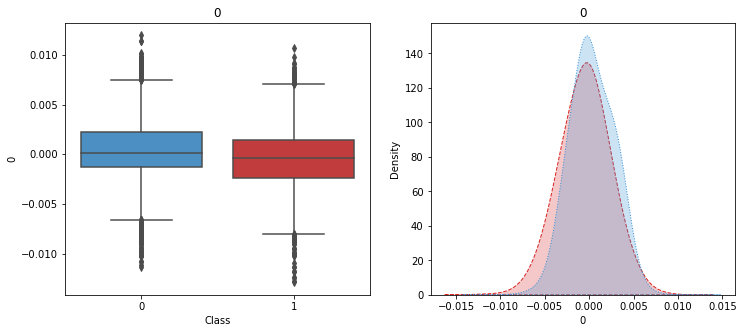

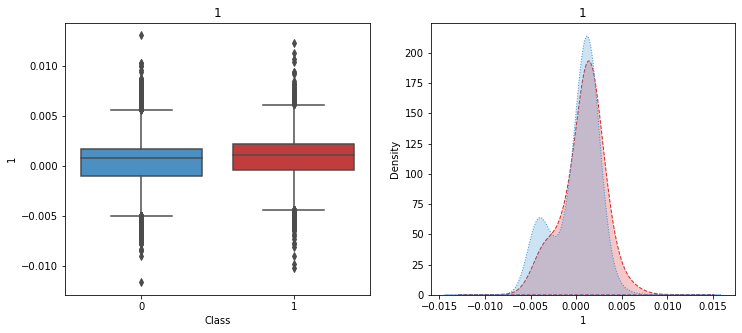

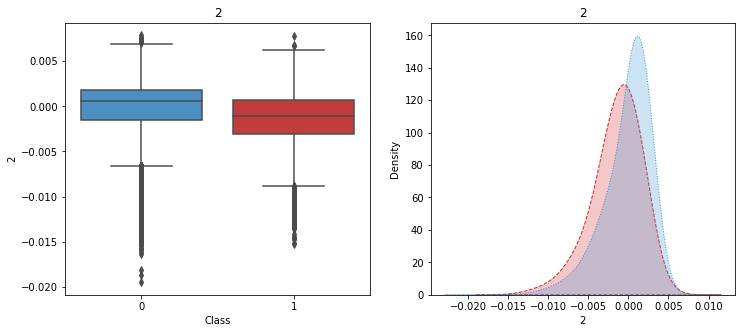

In [77]:
column_headers = vae_df.drop(['Class'],axis=1).columns.values
colors = ['#3791D7','#D72626']

for column_header in column_headers:    
    plt.figure(figsize=[12,5])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=vae_df,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(vae_df[vae_df['Class']==1][column_header], bw = 0.4, label = "Bad loans", shade=True, color='#D72626', linestyle="--")
    sns.kdeplot(vae_df[vae_df['Class']==0][column_header], bw = 0.4, label = "Good loans", shade=True, color= '#3791D7', linestyle=":")
    plt.title(column_header, fontsize=12)
    plt.show()

Text(0.5, 0.92, '3D plot')

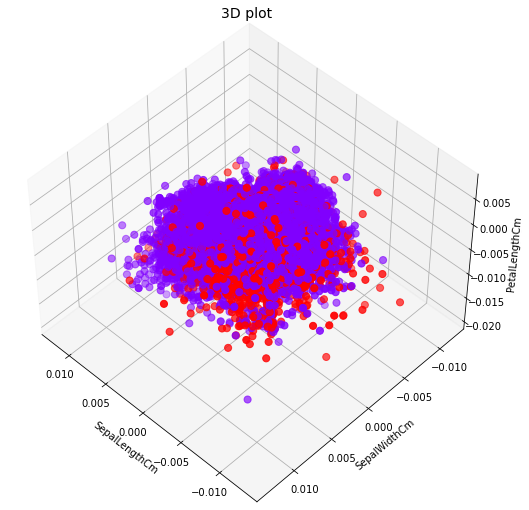

In [78]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(vae_df.iloc[:,0], vae_df.iloc[:,1], vae_df.iloc[:,2],
          c=y_train, cmap = plt.cm.rainbow, s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
plt.title("3D plot", fontsize=14)

---
---
# <div class="alert alert-info"> 5. Anomaly Detection </div>

## <font color=red>**5.1. Multivariate Gaussian**</font>

## <font color=red>**5.2. KNN**</font>

## <font color=red>**5.3.Auto Encoder**

In [79]:
####### Deep learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
# from ann_visualizer.visualize import ann_viz
# 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)
#
from IPython.display import display, Math, Latex
import datetime

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [80]:
X_train = X_train[y_train == 0]
y_train = y_train[y_train ==0]

X_train.shape

(112043, 10)

In [81]:
#set up graphic style in this case I am using the color scheme from xkcd.com
LABELS = ["Good Loans","Bad Loans"]
col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/

In [82]:
# No of Neurons in each Layer [6,4,2,4,6]
input_dim = X_train.shape[1]
encoding_dim = int(input_dim/2)
latent_dim = 5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(100), activation="relu")(encoder)
encoder = Dense(latent_dim, activation="relu")(encoder)
decoder = Dense(int(100), activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 100)               600       
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
Total params: 1,250
Trainable params: 1,250
Non-trainable par

In [83]:
nb_epoch = 100
batch_size = 3000
autoencoder.compile(optimizer='adam', loss='mse' )

cp = ModelCheckpoint(filepath="autoencoder.h1",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

t_ini = datetime.datetime.now()


history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1).history

t_fin = datetime.datetime.now()
print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))



df_history = pd.DataFrame(history)

Epoch 1/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0853 - val_loss: 0.0756
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0712 - val_loss: 0.0680
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0654
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0648 - val_loss: 0.0642
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0618 - val_loss: 0.0592
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0585 - val_loss: 0.0578
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0522 - val_loss: 0.0412
Epoch 8/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0378 - val_loss: 0.0331
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0257 - val_loss: 0.0209
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0175 - val_loss: 0.0148
Epoch 1

Epoch 83/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 84/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 85/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 86/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 87/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 88/100
34/34 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 89/100
34/34 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 90/100
34/34 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 91/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 92/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0

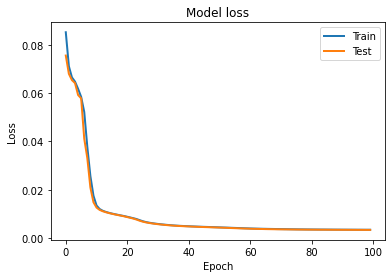

In [84]:
plt.plot(df_history['loss'], linewidth=2, label='Train')
plt.plot(df_history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [89]:
reconstructed_df = autoencoder.predict(X_test)
reconstructed_df = pd.DataFrame(reconstructed_df, index= X_test.index.values)
reconstructed_df.columns = X_test.columns.values
reconstructed_df['Class'] = y_test

reconstructed_df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Class
0,0.000000,0.567929,0.000000,0.976200,0.403386,0.217471,0.0,0.206380,0.0,0.000000,0
1,0.238197,0.427252,0.000000,0.124200,0.567804,0.259912,0.0,0.439678,0.0,0.205835,0
2,0.124444,0.381996,0.000000,0.035095,0.500585,0.148423,0.0,0.000000,0.0,0.148334,0
3,0.000000,0.534514,0.026011,0.063306,0.607571,0.609969,0.0,0.486526,0.0,0.440310,0
4,0.000000,0.634673,0.000000,0.001457,0.498423,0.143309,0.0,0.000000,0.0,0.000000,0


In [ ]:
vae_features = ['']

In [90]:
RE_per_dim_df = (X_test - reconstructed_df.drop(['Class'],axis=1))
RE_per_dim_df['total_error']= np.power(X_test - reconstructed_df.drop(['Class'],axis=1), 2).sum(axis=1)
RE_per_dim_df['Class'] = reconstructed_df['Class']                                              
RE_per_dim_df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,total_error,Class
0,0.013739,0.000878,0.000000,0.023800,0.002837,-0.017471,0.0,-0.006380,0.0,0.000000,0.001110,0
1,0.064512,0.049812,0.000000,0.001146,0.034945,0.054374,0.0,-0.039678,0.0,-0.005835,0.012430,0
2,-0.029419,0.195986,0.000000,-0.007789,-0.055808,-0.091280,0.0,0.000000,0.0,0.051666,0.053453,0
3,0.060766,-0.130845,-0.026011,0.006934,0.392429,0.047173,0.0,-0.086526,0.0,-0.040310,0.186875,0
4,0.022048,0.007529,0.000000,0.001133,-0.028050,-0.000452,0.0,0.000000,0.0,0.000000,0.001331,0


In [91]:
RE_per_dim_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,30000.0,0.015121,0.057165,-0.275223,-0.017727,0.006983,0.039189,0.413215
age,30000.0,-0.000271,0.085244,-0.359038,-0.039940,-0.002431,0.030775,0.471883
NumberOfTime30-59DaysPastDueNotWorse,30000.0,0.009328,0.066847,-0.158123,0.000000,0.000000,0.000000,1.000000
DebtRatio,30000.0,0.015799,0.043587,-0.160533,-0.003469,0.004653,0.017364,0.664579
MonthlyIncome,30000.0,0.000233,0.071727,-0.217356,-0.042586,-0.010737,0.026910,0.606074
NumberOfOpenCreditLinesAndLoans,30000.0,0.000964,0.076798,-0.240291,-0.047330,-0.010941,0.039379,0.548710
NumberOfTimes90DaysLate,30000.0,0.006223,0.049063,-0.255200,0.000000,0.000000,0.000000,1.000000
NumberRealEstateLoansOrLines,30000.0,-0.001009,0.039577,-0.292558,-0.013720,0.000000,0.009814,0.600000
NumberOfTime60-89DaysPastDueNotWorse,30000.0,0.014567,0.076770,-0.031622,0.000000,0.000000,0.000000,1.000000
NumberOfDependents,30000.0,-0.001799,0.025520,-0.185208,-0.009394,0.000000,0.000000,0.319635


In [92]:
test_df = pd.concat([X_test,y_test],axis=1)
mean_df = pd.DataFrame(columns=df.columns)
mean_df.loc[0,:] = test_df[test_df['Class']==0].mean()
mean_df.loc[1,:] = test_df[test_df['Class']==1].mean()
mean_df.loc[2,:] = reconstructed_df[reconstructed_df['Class']==0].mean()
mean_df.loc[3,:] = reconstructed_df[reconstructed_df['Class']==1].mean()
mean_df.loc[4,:] = RE_per_dim_df[RE_per_dim_df['Class']==0].mean()
mean_df.loc[5,:] = RE_per_dim_df[RE_per_dim_df['Class']==1].mean()
mean_df['Type'] = ['Origin','Origin','Reconstruction','Reconstruction','Error','Error']
mean_df.T

,0,1,2,3,4,5
Class,0.0,1.0,0.0,1.0,0.0,1.0
RevolvingUtilizationOfUnsecuredLines,0.111156,0.265306,0.097177,0.234762,0.013979,0.030544
age,0.482565,0.424391,0.482858,0.424342,-0.000294,0.000048
NumberOfTime30-59DaysPastDueNotWorse,0.039118,0.193717,0.032048,0.153896,0.00707,0.039821
DebtRatio,0.280127,0.259459,0.266852,0.209586,0.013275,0.049873
MonthlyIncome,0.511893,0.49915,0.510617,0.512999,0.001276,-0.013849
NumberOfOpenCreditLinesAndLoans,0.242407,0.22534,0.245428,0.170588,-0.003021,0.054752
NumberOfTimes90DaysLate,0.01044,0.143258,0.007501,0.092704,0.002939,0.050554
NumberRealEstateLoansOrLines,0.201482,0.188594,0.203598,0.174665,-0.002116,0.013928
NumberOfTime60-89DaysPastDueNotWorse,0.008979,0.090092,0.000004,0.000035,0.008975,0.090057


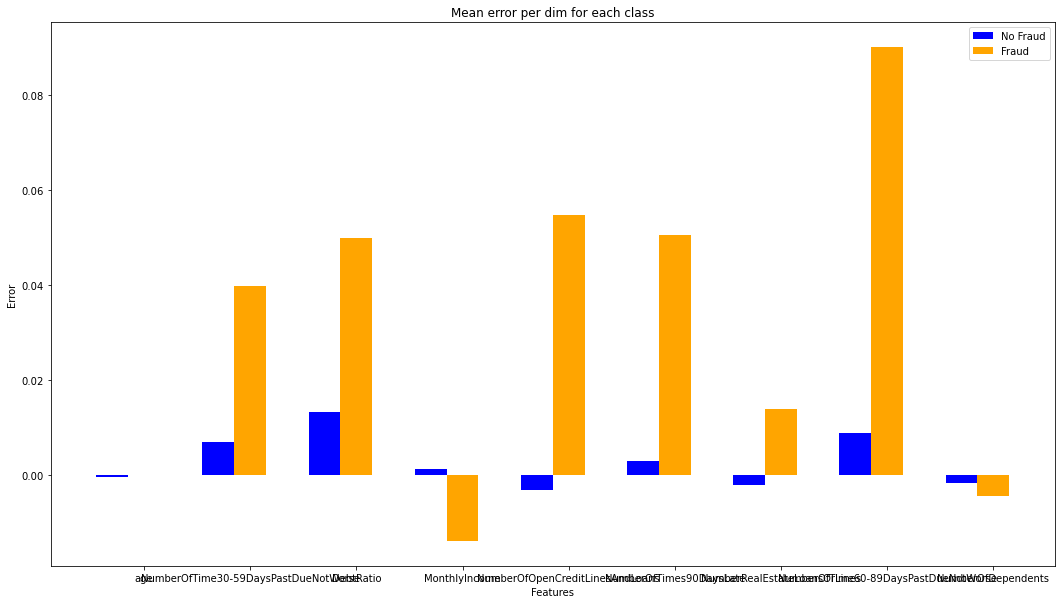

In [93]:
displayed_features = selected_features[1:]
bar_width = 0.3
index = np.arange(len(displayed_features))
plt.figure(figsize = (18,10))
plt.bar(index,mean_df.loc[4,displayed_features],bar_width,color = 'blue',label='No Fraud')
plt.bar(index+bar_width,mean_df.loc[5,displayed_features],bar_width,color = 'orange',label='Fraud')
plt.xlabel('Features')
plt.ylabel('Error')
plt.xticks(index+bar_width,displayed_features)
plt.title('Mean error per dim for each class')
plt.legend()
plt.show()

In [94]:
column_headers

array([0, 1, 2, 3, 4], dtype=object)

(2069, 11)
(27931, 11)


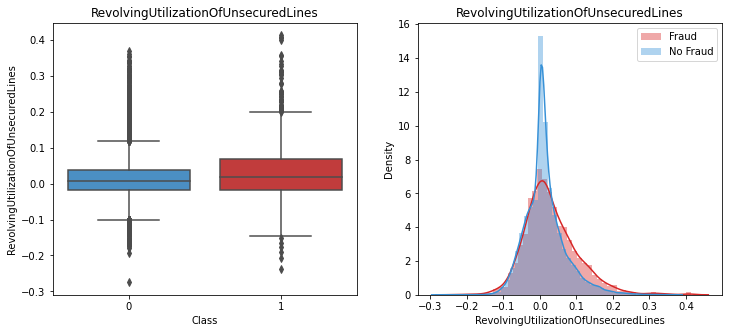

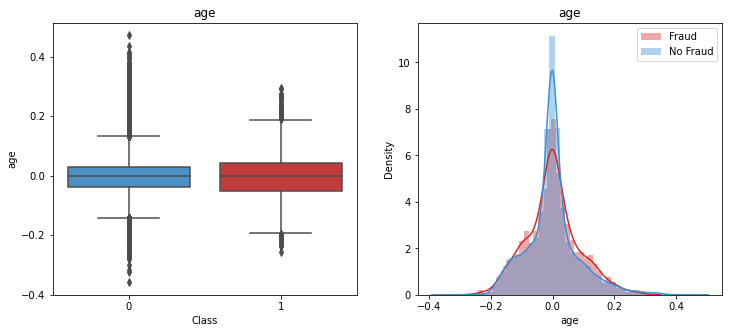

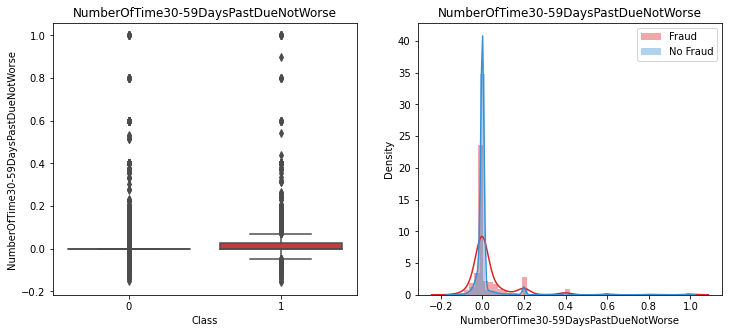

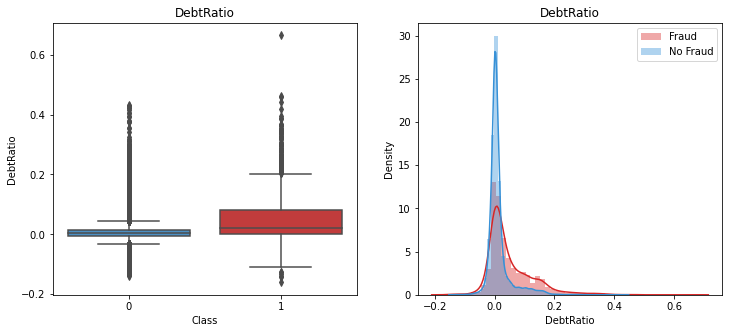

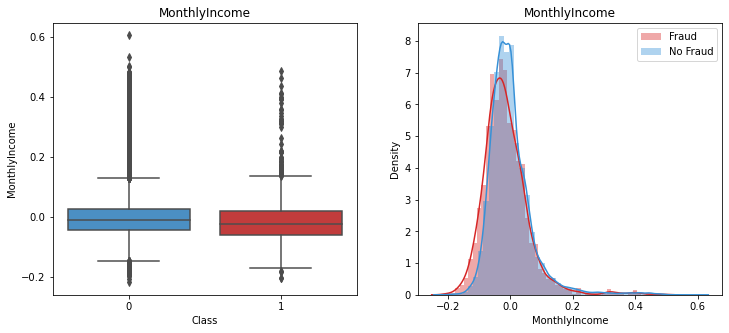

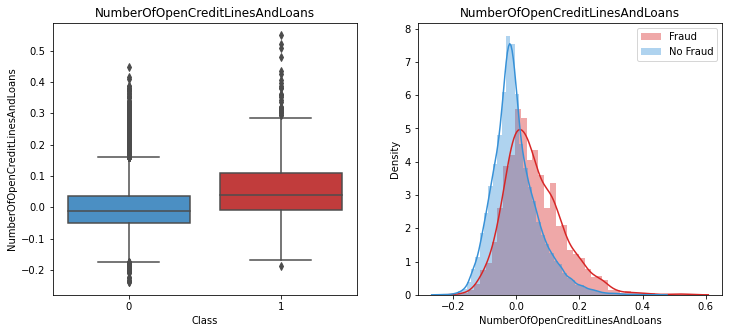

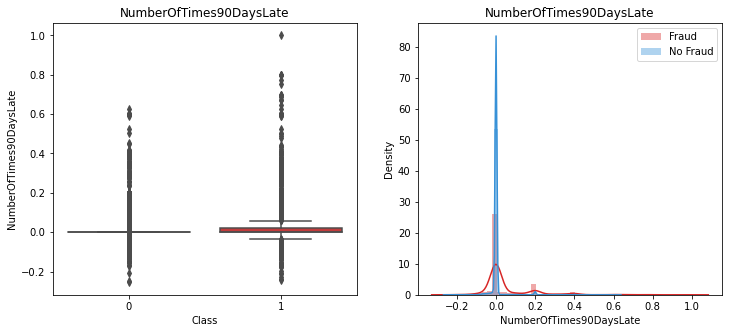

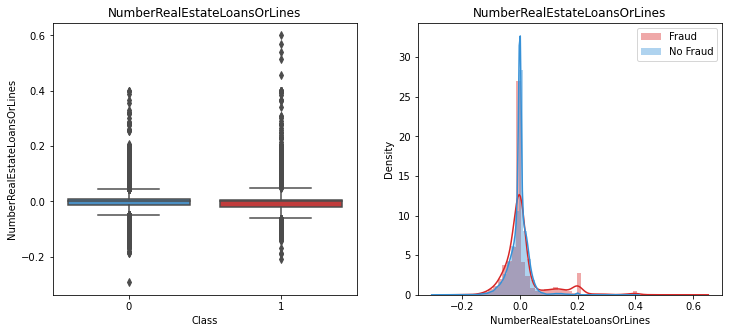

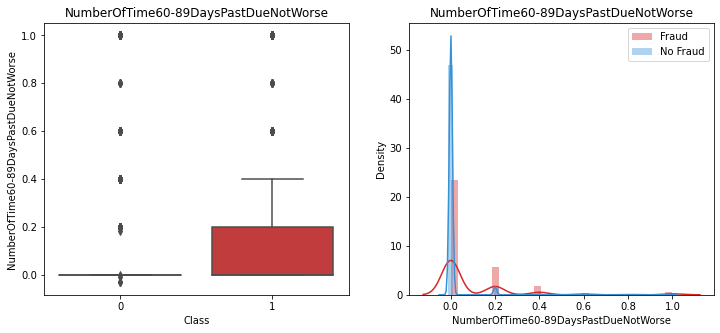

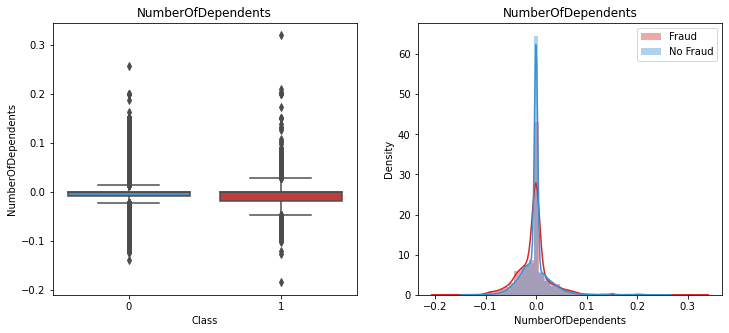

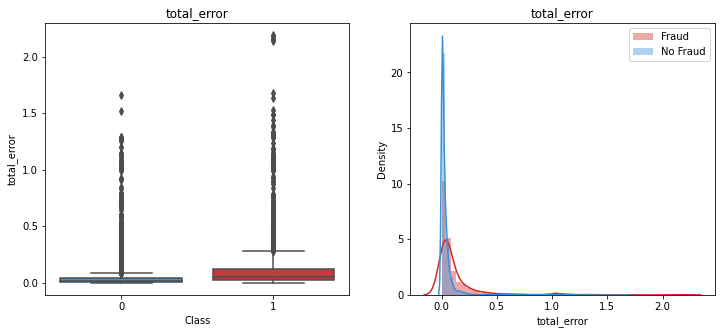

In [96]:
column_headers = RE_per_dim_df.drop(['Class'],axis=1).columns.values
colors = ['#3791D7','#D72626']

class1_df = RE_per_dim_df.loc[RE_per_dim_df['Class'] == 1,column_headers]
print(class1_df.shape)
class0_df = RE_per_dim_df.loc[RE_per_dim_df['Class'] == 0,column_headers]
print(class0_df.shape)

for column_header in column_headers:    
    plt.figure(figsize=[12,5])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=RE_per_dim_df,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.distplot(class1_df[column_header], label = "Fraud",  color='#D72626')
    sns.distplot(class0_df[column_header], label = "No Fraud", color= '#3791D7')
    plt.legend(loc='upper right')
    plt.title(column_header, fontsize=12)
    plt.show()

In [240]:
RE_per_dim_df.groupby('Class')['total_error'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,27931.0000,0.0058,0.0316,0.0000,0.0001,0.0006,0.0032,1.0464
1,2069.0000,0.0236,0.1271,0.0000,0.0005,0.0026,0.0103,1.0233


0 (27931, 12)
1 (2069, 12)


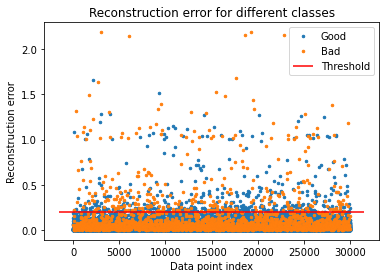

In [157]:
threshold_fixed = 0.2
groups = RE_per_dim_df.groupby('Class')
fig, ax = plt.subplots()

for name, group in groups:
    print(name, group.shape)
    ax.plot(group.index, group.total_error, marker='o', ms=2.5, linestyle='',
            label= "Bad" if name == 1 else "Good")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

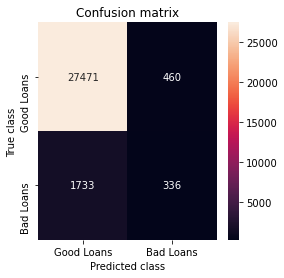

In [158]:
pred_y = [1 if e > threshold_fixed else 0 for e in RE_per_dim_df.total_error.values]
conf_matrix = confusion_matrix(RE_per_dim_df.Class, pred_y)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27931
           1       0.42      0.16      0.23      2069

    accuracy                           0.93     30000
   macro avg       0.68      0.57      0.60     30000
weighted avg       0.90      0.93      0.91     30000



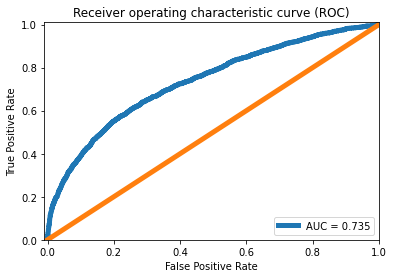

In [107]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(RE_per_dim_df.Class, RE_per_dim_df.total_error)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
ROC_df = pd.DataFrame()
ROC_df['false_pos_rate'] = false_pos_rate
ROC_df['true_pos_rate'] = true_pos_rate
ROC_df['thresholds'] = thresholds
ROC_df.head(5)

,false_pos_rate,true_pos_rate,thresholds
0,0.000000,0.000000,3.188703
1,0.000000,0.000483,2.188703
2,0.000000,0.002900,1.682940
3,0.000036,0.002900,1.661813
4,0.000036,0.003867,1.527782


In [103]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(df_error.Label, df_error.reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

NameError: name 'df_error' is not defined

In [84]:
PR_df = pd.DataFrame()
PR_df['precision_rt'] = precision_rt[1:len(threshold_rt)]
PR_df['recall_rt'] = recall_rt[1:len(threshold_rt)]
PR_df['threshold_rt'] = threshold_rt[1:len(threshold_rt)]
PR_df.head()

NameError: name 'precision_rt' is not defined

In [85]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

NameError: name 'threshold_rt' is not defined

## <font color=red>**5.4. SOM**

In [ ]:
df = scaled_df.copy()
X = df[selected_features].values
y = df['Class']

In [ ]:
# total no. of neurons required
total_neurons = 14

# calculate eigen_values
normal_cov = np.cov(X)
eigen_values = np.linalg.eigvals(normal_cov)

# 2 largets eigenvalues
result = sorted([i.real for i in eigen_values])[-2:]
ratio_2_largest_eigen = result[1]/result[0]

side = total_neurons/ratio_2_largest_eigen

# two sides
print(total_neurons)
print('1st side', side)
print('2nd side', ratio_2_largest_eigen)

In [ ]:

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 14, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [ ]:

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
plt.figure(figsize=(6,6))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.show()

In [ ]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,2)]), axis = 0)
frauds = scaler.inverse_transform(frauds)

## <font color=red>**5.5. Isolation Forest**

In [23]:
outlier_fraction = 0.4

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [24]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(df[df['Class']==1])


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))


Isolation Forest: 53888
0.6407466666666667
              precision    recall  f1-score   support

           0       0.98      0.63      0.77    139974
           1       0.13      0.80      0.23     10026

    accuracy                           0.64    150000
   macro avg       0.56      0.72      0.50    150000
weighted avg       0.92      0.64      0.73    150000

Local Outlier Factor: 58454
0.6103066666666667
              precision    recall  f1-score   support

           0       0.95      0.61      0.75    139974
           1       0.10      0.58      0.17     10026

    accuracy                           0.61    150000
   macro avg       0.52      0.59      0.46    150000
weighted avg       0.90      0.61      0.71    150000



<Figure size 648x504 with 0 Axes>